FITS: Flexible Image Transport System
===
 acts as a container (much like a zip file). 
 
 Within it, one can store several kinds of information: images (2d arrays of values), headers (dictionary like objects with metadata), and sometimes tabular data as well. 
 
 A FITS file can contain any number of extensions (which just refer to “slots” where stuff is stored). Every “slot” has a header attribute and a data attribute. Thus, you could store a hundred astronomical images in 1 file, each with a different extension and a different header describing the image in that slot.

* N.B. : Files that are explicitly single images almost always have the image stored in the 0th extension, while files that are explicitly table data tend to have the table stored in the 1st extension (with the 0th empty).

Problem 1: Loading a FITS file
===

Write a function which takes as its argument a string filepath to a FITS file, and should have an optional argument to set the extension (default 0). It should then load the given extension of that fits file using a context manager, and return a tuple containing the header and data of that extension.

The function should have documentation that describes the inputs and outputs. Documentation is incredibly important when writing code, both in-line and (# comments) and at the top of functions, methods, and classes.

In this class, we’ll be using Sphinx-compatible documentation written in the Numpy/Scipy style. There are several reasons to do this.

* It is a user-friendly and write-friendly, readable documentation format that is easy to add to your functions.
* It can be rendered by Sphinx, the most popular automatic documentation renderer. If you’ve ever read the online documentation pages for functions in, e.g., numpy and scipy, those pages were rendered automatically based on the docstrings of the functions in question. This is possible with tools like Sphinx, but the documentation must be formatted correctly for this to work.

In the cell below, I’ve provided a dummy function which takes in any number of inputs (mininum 3) and chooses a random input to return. The formatting of the documentation is shown there (as well as in the link above).

In [11]:
import numpy as np 

def random_return(a,b,c,*args):
    '''
    A function which requires three inputs which are floats, accepts any number of additional inputs (of any kind), and returns one randomly chosen input. 
    
    Parameters
    ----------
    a: int
        description of this integer input
    b: int
        description of this integer input
    c: int
        description of this integer input
    *args: tuple
        any additional arguments get stored here
    
    Returns
    -------
    choice 
        The randomly selected input (type not specified)
    '''
    full_input_list = [a,b,c] + list(args)
    choice = np.random.choice(full_input_list)
    return choice

In [2]:
from astropy.io import fits 
import os

# Write a function which takes as its argument a string filepath to a FITS file, 
# and should have an optional argument to set the extension (default 0). 

def load_fits(fpath,extension=0):
    '''
    Function to load a FITs file into Python

    Parameters
    ----------
    fpath: str
        path to the FITS file to load. must end in .fit/.fits/.FIT/.FITS
    extension: int (optional)
        extension of the FITS file to load. (default 0)
    
    Returns
    -------
    header: dict_like
        the read in header of the chosen extension, as a python dictionary
    data: array_like
        the data contained in the extension, whether an image or table.
    '''
    with fits.open(fpath) as hdu:
        header = hdu[extension].header
        data = hdu[extension].data
    return header, data           

In [3]:
rband = r'D:\Programming\kjkingsley.github.io\Scientific Computing\AstroPhys Study\Data\antenna_Rband.fits'
head, data = load_fits(rband)

Problem 2.2
---

Next, we neex to plot the image data. There are several operations that we almost always perform when plotting astronomical data, as well as several user-preferences for how we “by default” plot images before we begin tweaking things.

Write a function which takes in as input arguments
* an image (2D array or masked array)

as well as the following optional arguments (so set a default)

* figsize (default (15,13) )

* cmap (default ‘gray_r’)

* scale (default 0.5)

* **kwargs

Inside the function, create figure and axes objects using plt.subplots(). When working in notebooks, it is often useful to set the figsize argument of subplots to a nice large-ish value, such as (15,13), which will make the image fill most of the notebook. Since your function has set figsize as an argument, you can feed figsize directly into the subplots call, so that a user of the function can leave the default or set their own.

Next, use ax.imshow() to actually plot the image. You’ll want to save the output of this, e.g., im = ax.imshow(...). In this plotting call, set imshow’s argument origin='lower'. We always want to do this when dealing with imaging, as we want (0,0) to be a coordinate.

Also within the call to imshow(), feed in the cmap from your function (i.e., cmap=cmap). The other critical imshow() arguments are vmin and vmax, which sets the saturation points (and thus the contrast) of the image.

We haven’t set vmin and vmax as arguments of our outer function, but because of kwargs, we can still create a default here that can be overriden from outside.

As a default, within your function, calculate the mean and standard deviation of the image. Set some temporary variables with the quantities mu - scale * sigma and mu + scale * sigma (where here mu is the calculated mean and sigma is the calculated std dev, and scale was the optional input). Next, check the kwargs dictionary (which will exist in your function because we added the packing argument **kwargs to our function. IF vmin and vmax are in this dictionary, plug those into your imshow command. Otherwise, use the values determined by the calculation above. Bonus point for accomodating either no vmin/vmax entered, just vmin or vmax, or both (using the calculated values when things aren’t provided).

Your function should return the created fig and ax objects so the user can continue to tweak them.

Run your function and test its outputs. Once you’re satisfied it’s working, use it to plot the provided data. Find either a vmin/vmax pair, or a choice of scale which makes the image look pretty!

In [12]:
import matplotlib.pyplot as plt

# Your code
def implot(image,figsize=(15,13),cmap='gray_r',scale=0.5,**kwargs):
    ''' 
    A function that plots images with convenient defaults

    Parameters
    ----------
    image: array_like
        2D array containing an astronomical image to be plotted. Cutouts should be input as cutout.data.
    figsize: tuple, optional
        figure size to use. Default: (15,13)
    cmap: str, optional
        Colormap to use for the image. Default: 'gray_r'
    scale: float, optional
        By default, function will scale image to some number of standard deviations about the mean pixel value. Scale sets this number (or fraction). Default: 0.5.
    **kwargs
        Additional arguments are passed to matplotlib plotting commands. Currently supported: vmin, vmax.
        
    Returns
    -------
    fig, ax
        figure and axes objects containing currently plotted data.
    '''
    fig, ax = plt.subplots(figsize=figsize)
    mu = np.mean(image)
    s = np.std(image)
    dvmin = mu - scale*s
    dvmax = mu + scale*s
    # "check the kwargs dictionary: IF vmin and vmax are in this dictionary, 
    # plug those into your imshow command. Otherwise, use the values 
    # determined by the calculation above. Bonus point for accomodating 
    # either no vmin/vmax entered, just vmin or vmax, or both (using 
    # the calculated values when things aren’t provided)."
    if all(['vmin','vmax']) in kwargs.keys():
        im = ax.imshow(image,origin='lower',cmap=cmap,vmin=kwargs['vmin'],vmax=kwargs['vmax'])
    # ^ show the image with both plugged in vmin/max, elif one or the other...:
    elif 'vmin' in kwargs.keys():
        im = ax.imshow(image,origin='lower',cmap=cmap,vmin=kwargs['vmin'],vmax=dvmax)
    elif 'vmax' in kwargs.keys():
        im = ax.imshow(image,origin='lower',cmap=cmap,vmin=dvmin,vmax=kwargs['vmax'])
    # else default:
    else:
        im = ax.imshow(image,origin='lower',cmap=cmap,vmin=dvmin,vmax=dvmax)
    
    return fig, ax

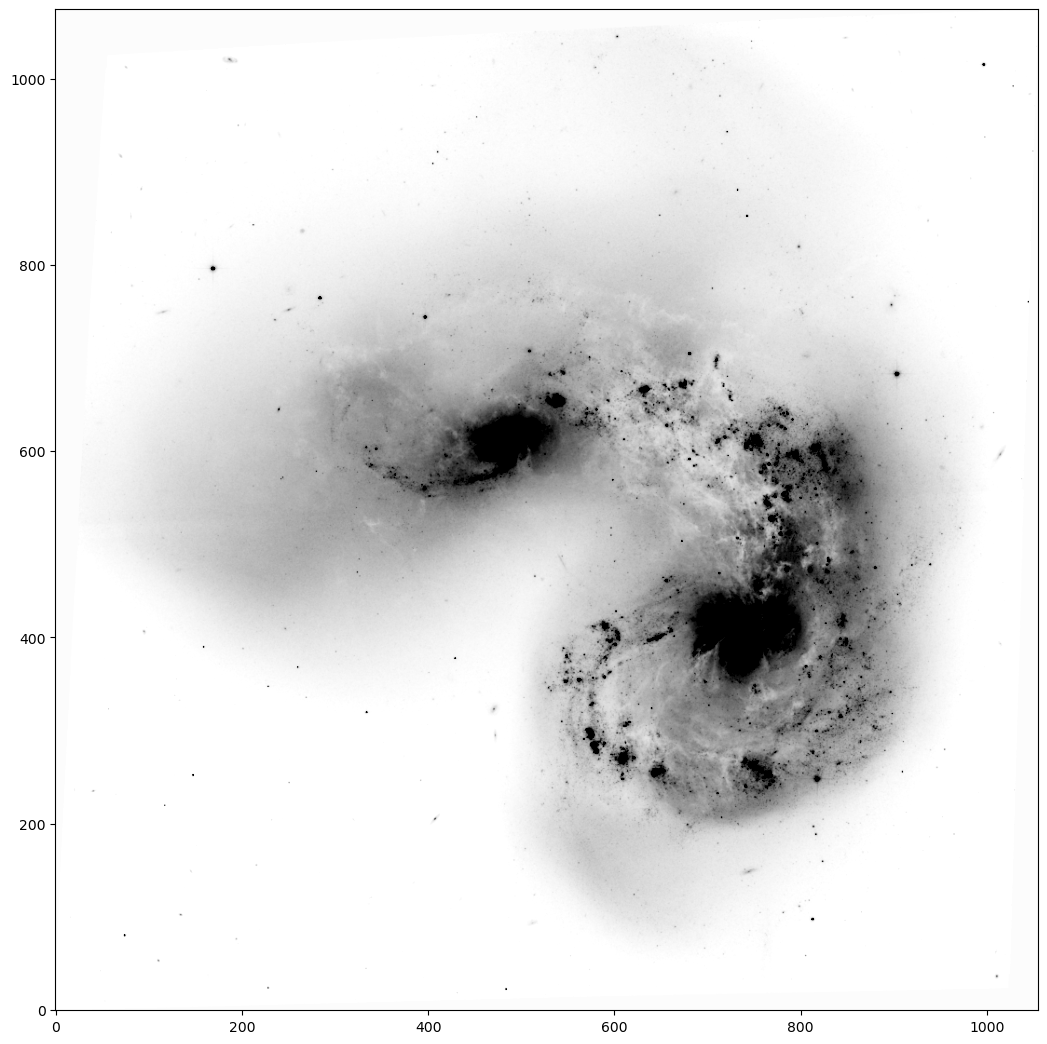

In [13]:
fig, ax = implot(data,scale=2.5,vmin=10,vmax=100)

Problem 2.3
------

So far, we’ve made it so that with a simple function call and, potentially, with just the input of an image array, we get out a nice plot with a scaling, colormap, and origin selection. In this section, we are going to allow (optionally) for a colorbar to be added to the figure. We’re also going to add in the ability for the figure to be plotted in celestial coordinates (i.e., RA and DEC) instead of pixel units, if information about the image (via the world coordinate system, WCS) exists in the image header.
* Generally, WCS information is present in the headers of published images like the one here, but not present in raw data gathered at the telescope. This is because images need to undergo a process known as plate solving to determine both the direction (coordinates) toward the image, as well as the pixel scale (i.e., how many arcseconds per pixel in the image).

Add three new optional arguments to your function.

    colorbar = False

    header = None

    wcs = None

Let’s start with the colorbar. At the end of your plotting commands, check if colorbar=True, and if so, create a colorbar via plt.colorbar(), setting the mappable argument to whatever you saved the output of ax.imshow() into above. Also set the ax argument to be your ax; this will tell matplotlib to steal a bit of space from that axis to make room for the colorbar.

In [14]:
# COLORBAR SORCERY (to set cbar height within axes, not image height)
from mpl_toolkits import axes_grid1

def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)

In [15]:
def implot(image,figsize=(15,13),cmap='gray_r',scale=0.5,colorbar=False,header=None,wcs=None,**kwargs):
    ''' 
    Plot an astronomical image, setting default options and easy tweaking of parameters
    
    Parameters
    ----------
    image: array_like
        2D array containing an astronomical image to be plotted. Cutouts should be input as cutout.data.
    figsize: tuple, optional
        figure size to use. Default: (15,13)
    cmap: str, optional
        Colormap to use for the image. Default: 'gray_r'
    scale: float, optional
        By default, function will scale image to some number of standard deviations about the mean pixel value. Scale sets this number (or fraction). Default: 0.5.
    colorbar: bool, optional
        Whether to add a colorbar or not. Default: False
    header: dict, optional
        If input, function will attempt to create a WCS object from header and plot in celestial coordinates. Default: None
    wcs: WCS object
        If input, the function will plot using a projection set by the WCS. Default: None
    **kwargs
        Additional arguments are passed to matplotlib plotting commands. Currently supported: vmin, vmax.
        
    Returns
    -------
    fig, ax
        figure and axes objects containing currently plotted data.
    '''
    fig, ax = plt.subplots(figsize=figsize)
    mu = np.mean(image)
    s = np.std(image)
    dvmin = mu - scale*s
    dvmax = mu + scale*s
    if all(['vmin','vmax']) in kwargs.keys():
        im = ax.imshow(image,origin='lower',cmap=cmap,vmin=kwargs['vmin'],vmax=kwargs['vmax'])
    # ^ show the image with both plugged in vmin/max, elif one or the other...:
    elif 'vmin' in kwargs.keys():
        im = ax.imshow(image,origin='lower',cmap=cmap,vmin=kwargs['vmin'],vmax=dvmax)
    elif 'vmax' in kwargs.keys():
        im = ax.imshow(image,origin='lower',cmap=cmap,vmin=dvmin,vmax=kwargs['vmax'])
    # else default:
    else:
        im = ax.imshow(image,origin='lower',cmap=cmap,vmin=dvmin,vmax=dvmax)
    if colorbar:
        add_colorbar(im)
    return fig, ax

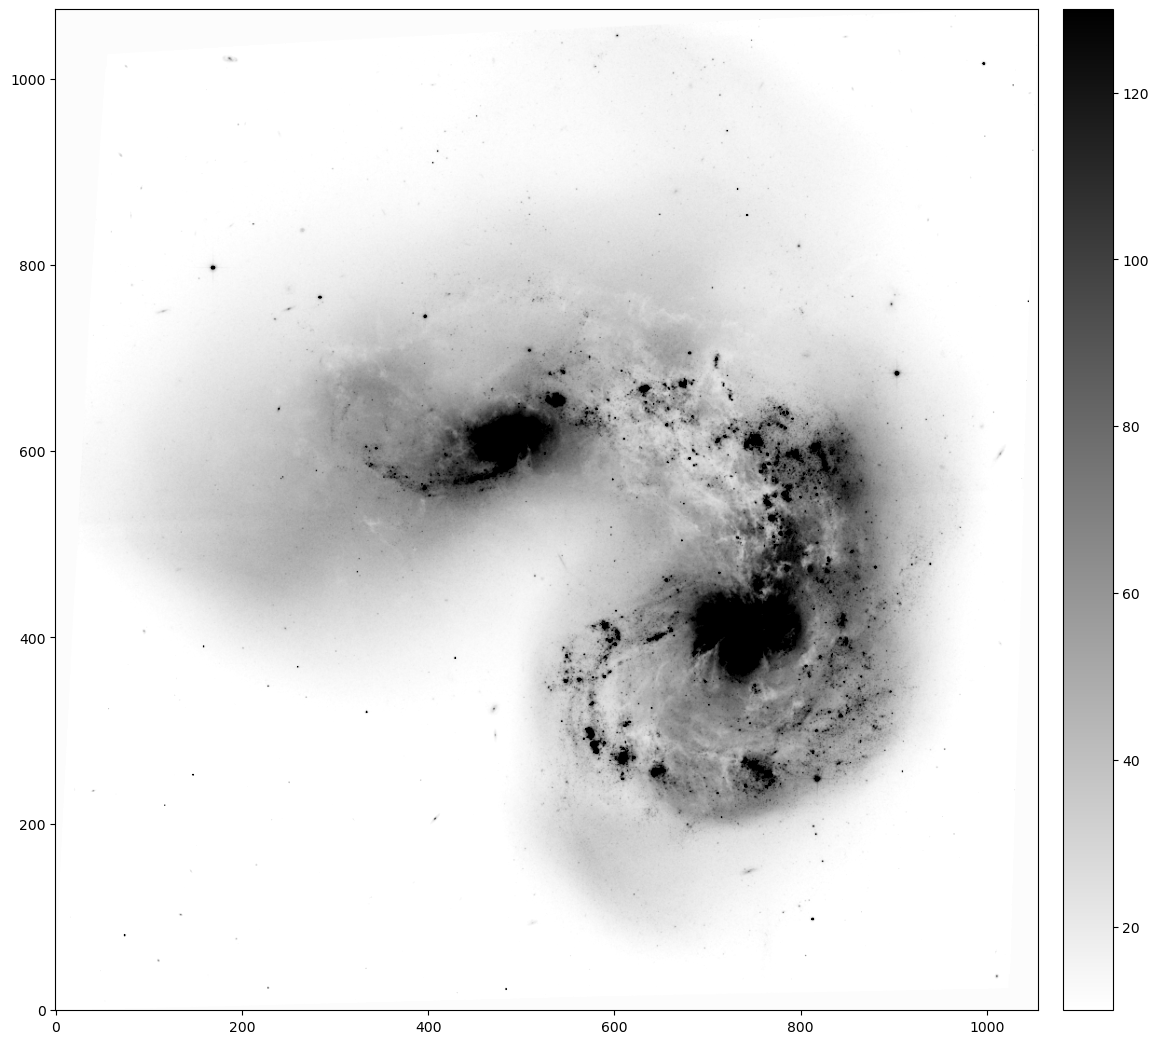

In [16]:
fig, ax = implot(data,scale=2.5,vmin=10,vmax=100,colorbar=True)

In order to plot in RA and DEC coordinates, we need to first have an astropy WCS object associated with the image in question. You can import WCS from astropy.wcs. WCS objects are created from the headers of plate-solved fits files. In our function, we allow the user to input either a header or a WCS object directly. More on WCS can be found in the lecture notes, or here.

Within your function, check if a wcs is input – if it is, we’re good to go and can safely ignore header (even if it is provided). If instead only header is provided, use the WCS() function to create a new wcs object from that header.

We now need to move our fig, ax = .... creation line into an if-statement. If we are using WCS “stuff”, you’ll need to set a projection for your plot that uses the wcs. This is accomplished as follows:

```
fig, ax = plt.subplots(...,subplot_kw={'projection':wcs})
```



In [17]:
from astropy.wcs import WCS

def strip_SIP(header):
    A_prefixes = [i for i in header.keys() if i.startswith('A_')]
    B_prefixes = [i for i in header.keys() if i.startswith('B_')]
    for a,b in zip(A_prefixes,B_prefixes):
        del header[a]
        del header[b]
    return header

def implot(image,figsize=(15,13),cmap='gray_r',scale=0.5,colorbar=False,header=None,wcs=None,**kwargs):
    ''' 
    Plot an astronomical image, setting default options and easy tweaking of parameters
    
    Parameters
    ----------
    image: array_like
        2D array containing an astronomical image to be plotted. Cutouts should be input as cutout.data.
    figsize: tuple, optional
        figure size to use. Default: (15,13)
    cmap: str, optional
        Colormap to use for the image. Default: 'gray_r'
    scale: float, optional
        By default, function will scale image to some number of standard deviations about the mean pixel value. Scale sets this number (or fraction). Default: 0.5.
    colorbar: bool, optional
        Whether to add a colorbar or not. Default: False
    header: dict, optional
        If input, function will attempt to create a WCS object from header and plot in celestial coordinates. Default: None
    wcs: WCS object
        If input, the function will plot using a projection set by the WCS. Default: None
    **kwargs
        Additional arguments are passed to matplotlib plotting commands. Currently supported: vmin, vmax.
        
    Returns
    -------
    fig, ax
        figure and axes objects containing currently plotted data.
    '''
    if (header==None) and (wcs==None):
        fig, ax = plt.subplots(figsize=figsize)
    elif wcs is not None:
        fig, ax = plt.subplots(figsize=figsize,subplot_kw={'projection':wcs})
        ax.set_xlabel('Right Ascension [hms]',fontsize=15)
        ax.set_ylabel('Declination [degrees]',fontsize=15)
        ax.coords.grid(color='gray', alpha=0.5, linestyle='solid')
    elif header is not None:
        for i in header.keys():
            if i.startswith('A_'):
                del header[i]
            elif i.startswith('B_'):
                del header[i]
        header = strip_SIP(header)
        wcs = WCS(header)
        fig, ax = plt.subplots(figsize=figsize,subplot_kw={'projection':wcs})
        ax.set_xlabel('Right Ascension [hms]',fontsize=15)
        ax.set_ylabel('Declination [degrees]',fontsize=15)
        ax.coords.grid(color='gray', alpha=0.5, linestyle='solid')
    mu = np.mean(image)
    s = np.std(image)
    dvmin = mu - scale*s
    dvmax = mu + scale*s
    if all(['vmin','vmax']) in kwargs.keys():
        im = ax.imshow(image,origin='lower',cmap=cmap,vmin=kwargs['vmin'],vmax=kwargs['vmax'])
    # ^ show the image with both plugged in vmin/max, elif one or the other...:
    elif 'vmin' in kwargs.keys():
        im = ax.imshow(image,origin='lower',cmap=cmap,vmin=kwargs['vmin'],vmax=dvmax)
    elif 'vmax' in kwargs.keys():
        im = ax.imshow(image,origin='lower',cmap=cmap,vmin=dvmin,vmax=kwargs['vmax'])
    # else default:
    else:
        im = ax.imshow(image,origin='lower',cmap=cmap,vmin=dvmin,vmax=dvmax)
    if colorbar:
        add_colorbar(im)
    return fig, ax

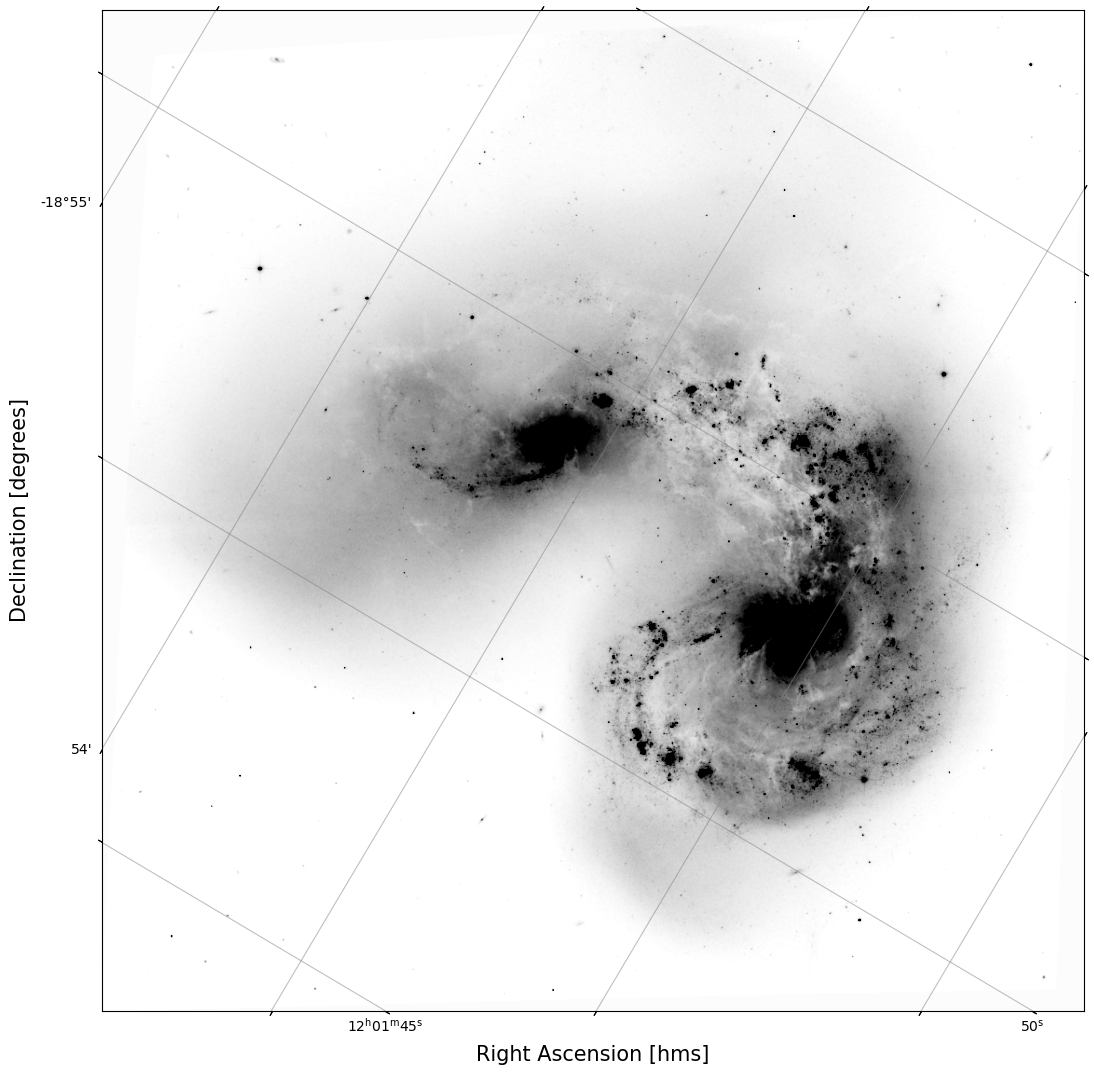

In [18]:
fig, ax = implot(data,scale=2.5,header=head,vmin=10)

Problem 3: Cutouts and Aperture Photometry¶
===
When working with astronomical images, like the one we’ve been using in this lab, it is often advantageous to be working with a cutout – a chunk of the image centered on a certain coordinate, and of a certain size. For example, if there is an HII region or star cluster of interest in the above image, we may like to zoom in on it to examine it more closely.

Now that we’ve switched over to using celestial coordinates instead of pixels as our projection frame, zooming in on a region is not as simple as slicing our array, e.g., image[500:700,200:550]. On the plus side, the framework we’ll learn here is very robust, and will allow for all sorts of useful measurements.

To make a cutout, we’ll need the Cutout2D module within astropy, which I’ll import below. To provide the position of the cutout, we need to be able to feed in astronomical coordinates. For this, we’ll use SkyCoord, a module in astropy.coordinates. Finally, we’ll need to integrate the units module in astropy to successfully create coordinate objects.

In [19]:
from astropy.nddata import Cutout2D
from astropy.coordinates import SkyCoord
import astropy.units as u

Let’s start with a SkyCoord object. There are several coordinate systems used in astronomy, e.g., Galactic coordinates (b, l), Equatorial (RA, DEC). The most common (especially in any extragalactic setting) is RA and DEC (as you can see in the image you’ve plotted already).
The documentation for SkyCoord is solid, and worth reading.
The general way we create these objects is, e.g.,
```coord = SkyCoord('12:01:53.6 -18:53:11',unit=(u.hourangle,u.deg))```
In this case, the coordinates I set above are for NGC 4039, which is the smaller of the two galaxies in the image we’re using.

*NOTE!!*
 If at any point you’re trying to make a coordinate object for a well known galaxy/object, try, e.g., coord = SkyCoord.from_name('NGC 4038'), and ususally that will work!
 In the cell below, use the coordinate we’ve created, plus a size (use 1x1 arcminutes), and the wcs object for our image, to create a Cutout2D object.

In [20]:
coord = SkyCoord('12:01:53.6 -18:53:11',unit=(u.hourangle,u.deg))


In [21]:
cutout = Cutout2D(data,coord,size=(1*u.arcmin,1*u.arcmin),wcs=WCS(head))

(<Figure size 1500x1300 with 1 Axes>, <WCSAxes: >)

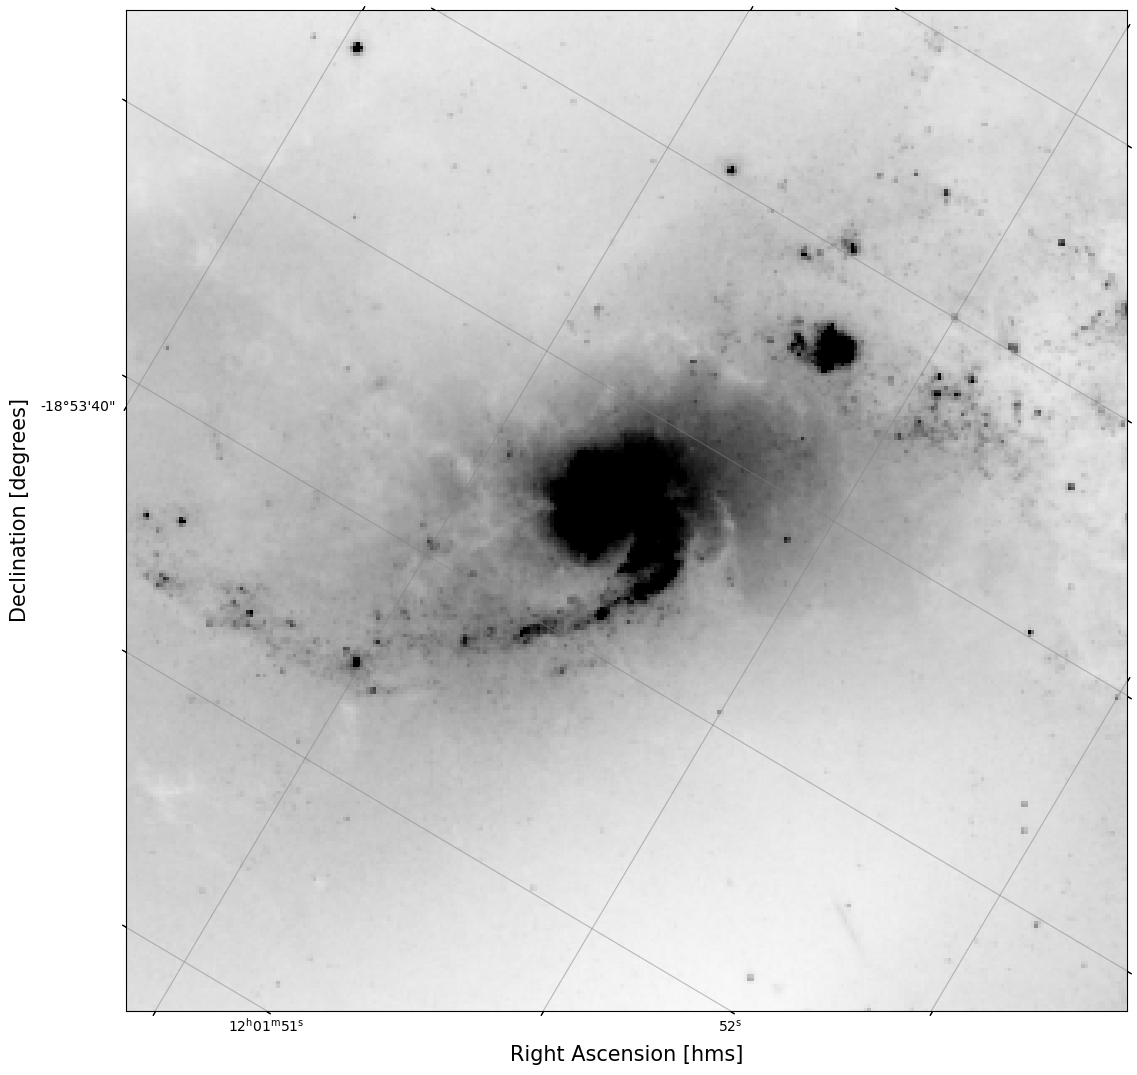

In [22]:
implot(cutout.data,scale=2,vmin=10,wcs=cutout.wcs)

Prob 3: Aperture Photometry
===
"Aperture Photometry is the process of defining a region on an image (generally, but not always circular), and measuring the sum pixel value within that region. The region is known as an aperture, and the “collapsing” of the 2D spatial information about counts in each pixel into a single number is known as photometry."

Below, I provide a new coordinate, this time centered on the region between the two galaxies. Make a new cutout of that region (again, 1x1 arcmin), and plot it.

(<Figure size 1500x1300 with 1 Axes>, <WCSAxes: >)

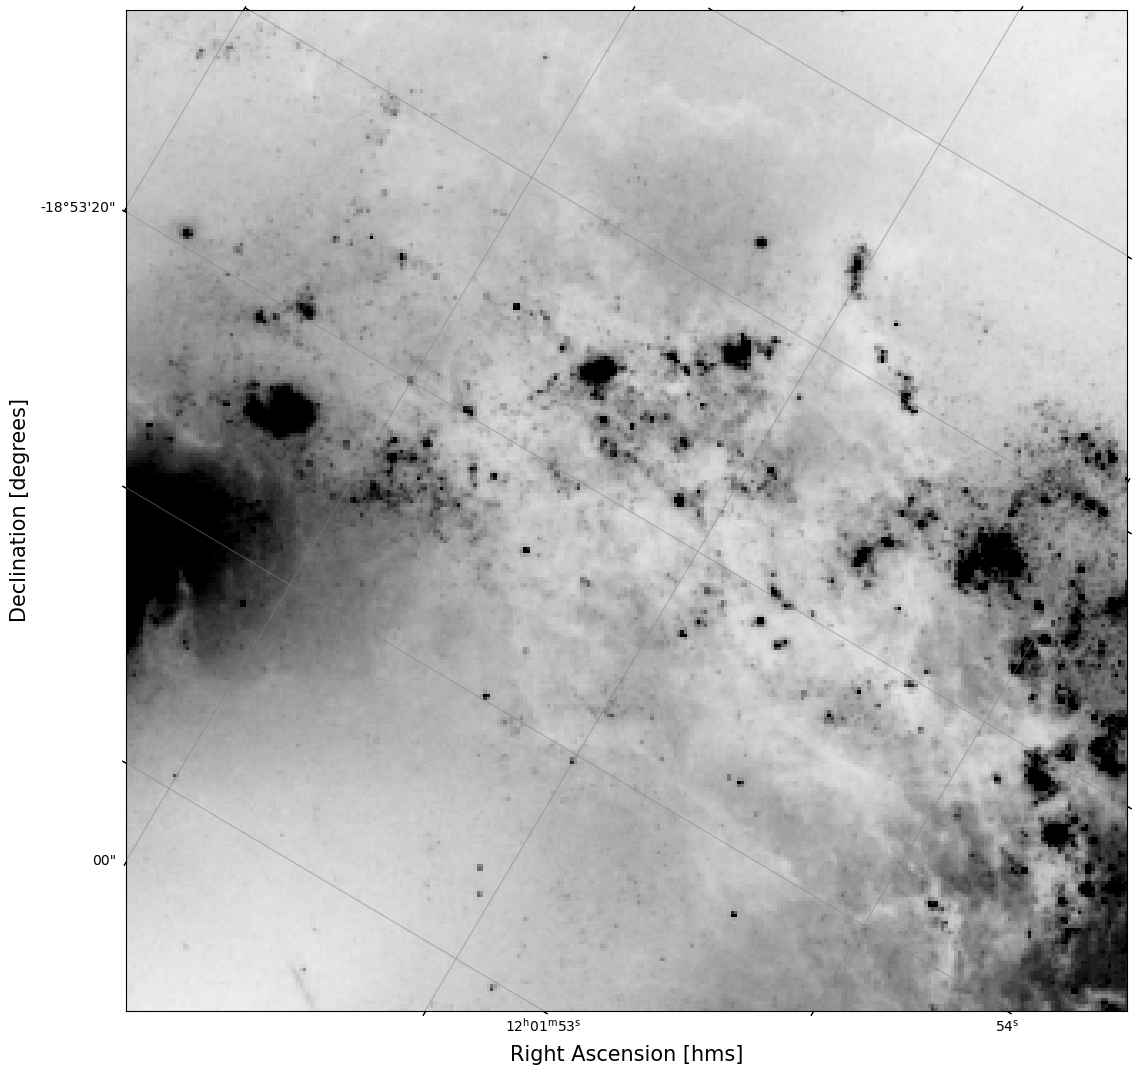

In [23]:
new_coord = SkyCoord('12:01:55.0 -18:52:45',unit=(u.hourangle,u.deg))
new_cutout = Cutout2D(data,new_coord,size=(1*u.arcmin,1*u.arcmin),wcs=WCS(head))
implot(new_cutout.data,scale=2,vmin=10,wcs=new_cutout.wcs)

In this region, there are a lot of blobby looking roughly circular sources — Some of the larger ones are HII star forming regions, the smaller ones are likely stars. Later in this lab, we’ll use multi-wavelength data to try to suss out what is what.

Often, for calibration purposes, we’d need to create apertures around all those sources in the image. We definitely don’t want to do that by hand! Instead, we’re going to use the sep package.

In [24]:
import sep

There are three steps to performing aperture photometry with sep, which are detailed in it’s documentation. https://sep.readthedocs.io/en/v0.4.x/

    Estimate the background

    Find Sources

    Perform Aperture Photometry

Using the instructions presented in the documentation linked, measure the background of the cutout image, and run the source extractor on it. Don’t forget to subtract the background before running the extractor!

To do this, write a function that takes as input the data (in this case, a cutout.data object and a threshold scale (to be multiplied by the globalrms, and performs these steps, returning the objects array. Don’t forget to document it!

In [25]:
# Your code

def run_sep(data, thresh_scale=2.0):
    '''
    A function that runs the core steps of the sep package for aperture photomety - background
     estimation, source finding, and finally aperture photometry - on the input.
    
    Parameters
    ----------
    data: array_like
        the 2D image to be acted on
    thresh_scale: float
        a scaling parameter used by sep to determine when to call something a source (see sep documentation)

    Returns
    -------
    objects: numpy struct array
        numpy structured array containing the sep-extracted object locations, etc. 
    '''                       
    # define and extract background   
    data_corder = data.copy(order='C')
    #funny biz ^ to meet C programming reqs of sep
    bkg = sep.Background(data_corder)
    # turn background into 2d array ^
    back = bkg.back()
    data_bg_sub = data - back
    c_copy = data_bg_sub.copy(order="C")
    # apply threshold for identifying sources
    thresh = thresh_scale * bkg.globalrms
    # extract sources from background-less image based on thresh
    objects = sep.extract(c_copy, thresh)
    return objects

In [26]:
objects = run_sep(new_cutout.data)
len(objects)
# Prints an object array of all the sources detected

103

The positions of the determined sources are stored in the output structured array and can be indexed with, e.g., objects['x'] and objects['y']. Replot your image of the cutout, but now circle the positions of all your detected sources. Do they line up with actual point sources in the image?

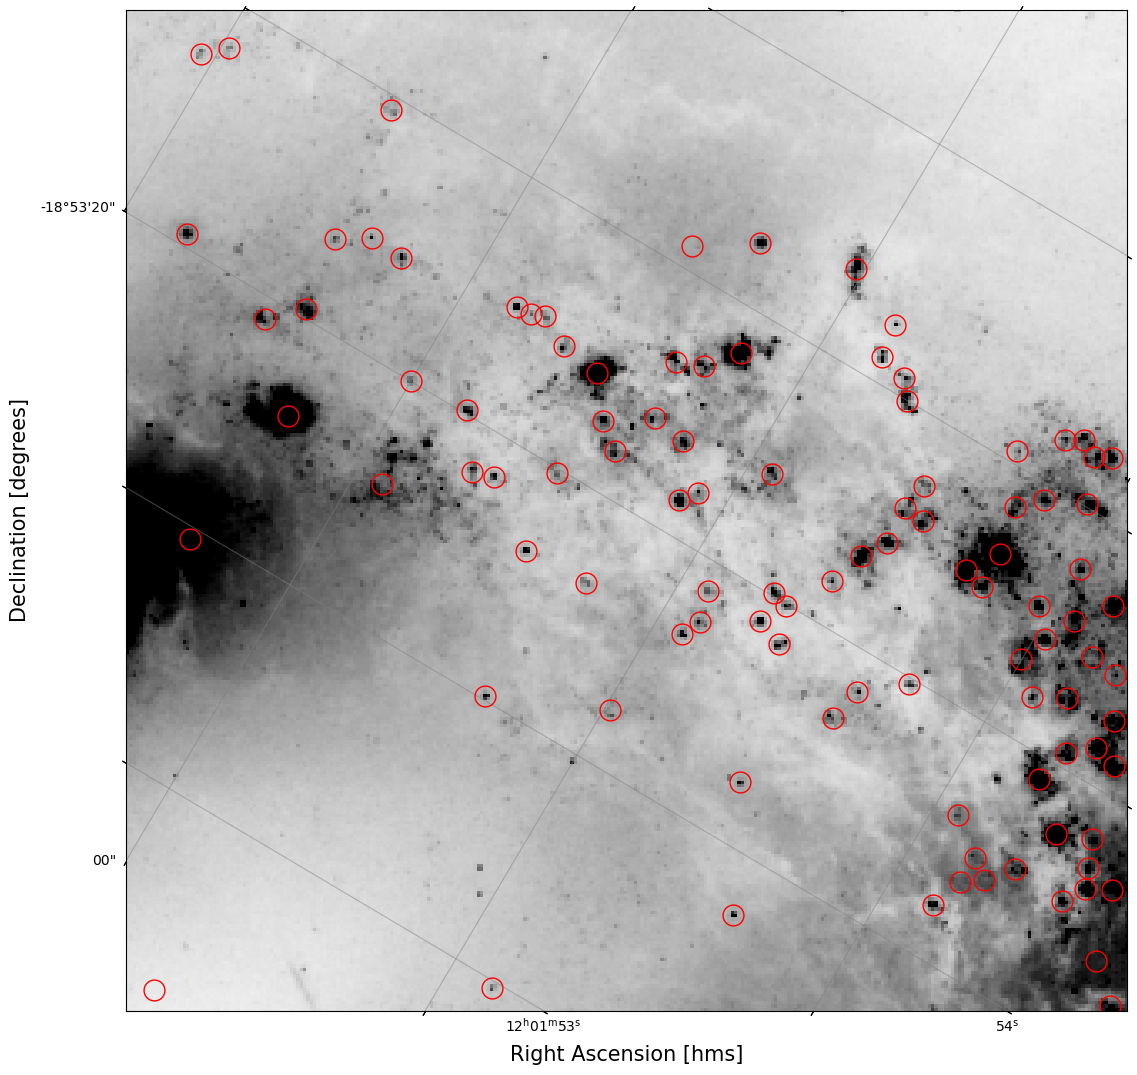

In [27]:
fix, ax = implot(new_cutout.data,scale=2,vmin=10,wcs=new_cutout.wcs)
ax.plot(objects['x'],objects['y'],'o',ms=15,color='None',mec='r')

In [28]:
import pandas as pd
df = pd.DataFrame(objects)
df.head()

,thresh,npix,tnpix,xmin,xmax,ymin,ymax,x,y,x2,...,cxy,cflux,flux,cpeak,peak,xcpeak,ycpeak,xpeak,ypeak,flag
0,13.807426,19,15,291,298,0,2,294.331652,0.748626,3.010990,...,0.528804,612.740173,767.704102,55.058762,99.534592,294,0,294,0,2
1,13.807426,7,4,108,110,5,7,109.067891,6.332346,0.508919,...,-0.177127,143.963638,178.128448,28.999582,66.128693,109,6,109,6,0
2,13.807426,222,214,0,22,0,16,8.012520,5.514646,32.370749,...,0.033329,3656.097412,3757.238525,21.895723,24.796696,1,1,1,6,2
3,13.807426,10,4,180,183,27,29,181.260591,28.091515,0.624076,...,0.004285,455.730774,508.251770,93.388168,261.102325,181,28,181,28,0
4,13.807426,12,9,240,243,30,33,241.296235,31.149263,0.837190,...,0.627759,476.430389,603.428528,72.289940,157.386230,241,31,242,31,0


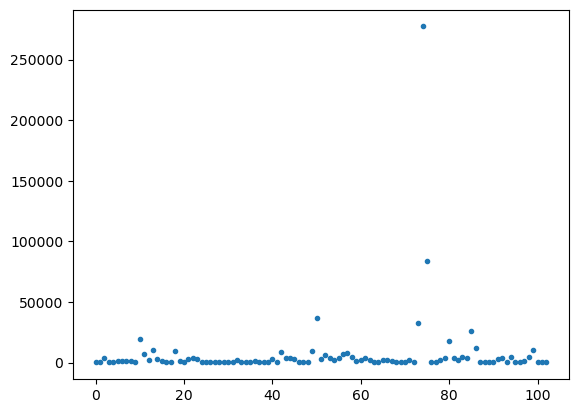

In [29]:
plt.plot(df.flux,'.')

Write a function called remove_outliers that reads in a dataframe and a flux-min and flux-max. It should filter the dataframe to only include fluxes between the input values, and return the new dataframe. Then use this function on your data, choosing an appropriate cutoff.

In [38]:
# Quick analysis to determine upper and lower bounds:
df.flux.describe()

count       103.000000
mean       7006.096197
std       28667.811209
min         138.010086
25%         497.185028
50%        1437.459473
75%        3921.275513
max      277233.906250
Name: flux, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1dfb3410100>,
 'caps': [<matplotlib.lines.Line2D at 0x1dfb3410af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dfb34108e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1dfb1dc3400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dfb1dc36a0>],
 'means': []}

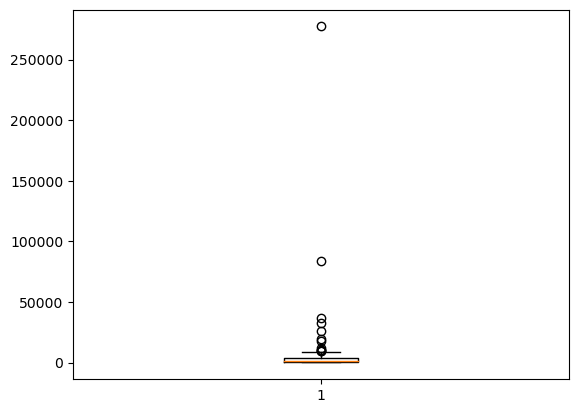

In [40]:
plt.boxplot(df.flux)

In [41]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers
find_outliers_IQR(df.flux)

10     19647.167969
13     10593.623047
18      9919.916992
49      9952.145508
50     36518.820312
73     32636.417969
74    277233.906250
75     83793.039062
80     17463.673828
85     25808.171875
86     11712.947266
99     10827.031250
Name: flux, dtype: float64

In [43]:
def remove_outliers(df,flux_min,flux_max):
    return df.loc[(df['flux']>flux_min)&(df['flux']<flux_max)]

In [47]:
df2 = remove_outliers(df,0,10000)

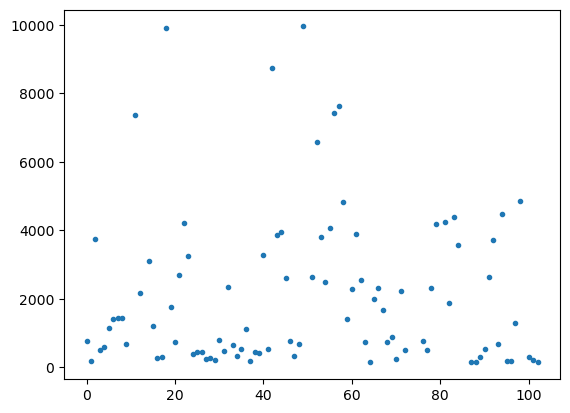

In [48]:
plt.plot(df2.flux,'.')

Re-plot the set of sources you have now, over the data.

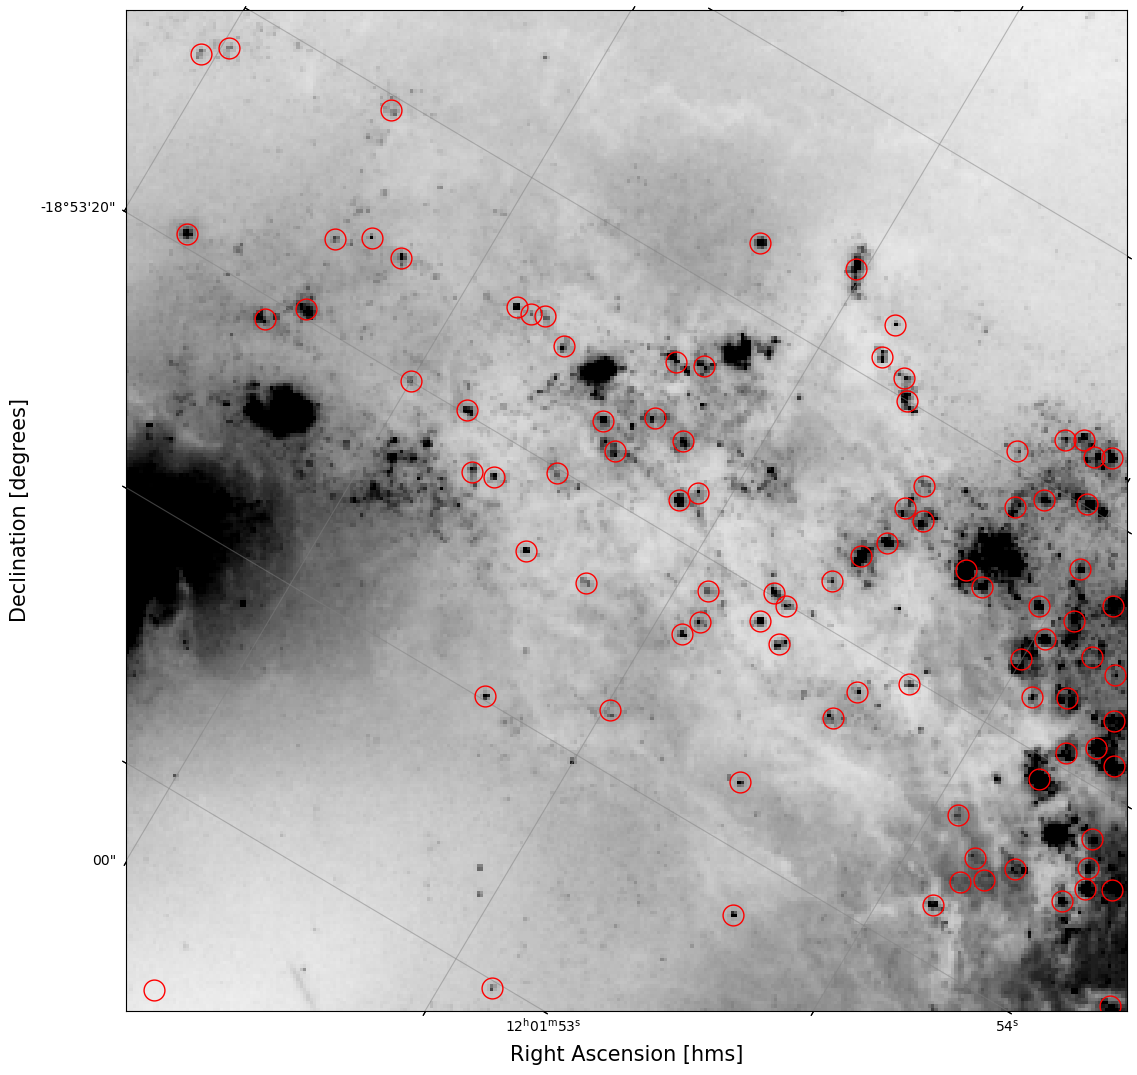

In [49]:
fix, ax = implot(new_cutout.data,scale=2,vmin=10,wcs=new_cutout.wcs)
ax.plot(df2['x'],df2['y'],'o',ms=15,color='None',mec='r')